### Scribers
    Kang Christopher
    McCabe Brendan

In [1]:
# %load ../standard_import.txt
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.linear_model import LogisticRegression
from sklearn import datasets
%matplotlib inline


# Logistic Regression

The linear regression model that was previously discussed gives a quantitative value to the response variable.  Linear regression does not give qualitative values to the response variable.  One possible model that can be used in cases where qualitative values are needed is the logistic regression model.  Basically, Linear regression is cases where the response variable represents a quantitative value of an instance and logistic regression is used in cases where the value of the response variable represents a classification. For example, logistic regression can be used to predict if a student will get an A on a test or not based on data.  Linear regression on the other hand could be used to predict the percentage grade that the student receives on the test.

## Classification

Classification is the method of taking inputs and assigning each input a qualitative outcome.  In other words, each input is assigned to a category within a set.  Besides assigning the a qualitative outcome to the inputs, classification is also used to determine the probability that an input belongs to a category. 

## Classes of Logistic Regression

There a two different classes of logistic regression.  First is simple or binary logistic regression which is requires that there is only one input.  The other class of logistic regression is multiclass logistic regression which requires two or more inputs.  For now we will examine an example of binary regression.

## Dataset

For this example, the dataset that will be used will contain data of people who default on their credit card payment (brown marks) and those people who don't (blue marks).  There is also data on the income and balance of each individual in the dataset.

<img src="http://128.171.10.138:4000/assets/ipynb/week_13/images/classification_1.png" alt="Drawing" style="width: 900px;"/>

## Justification for logistic regression

Logistic regression requires that the response variable is qualitative.  In our credit card default payment example, the response variable would be whether or not a person defaulted on a credit card payment.  The two categories that the response variable will be predicted to belong to are 0(the person defaulted) and 1(the person didn't default).  By using our dataset, we can calculate the probability that a person will default on a payment in relation to their balance.

## Using Linear in Classification
<img src="http://128.171.10.138:4000/assets/ipynb/week_13/images/regression_1.png" alt="Drawing" style="width: 400px;"/>

## Using Linear in Classification - Cont'd

One important thing about linear regression is that it assigns continuous values to the response variable.  Although two separate classes might be represented by 1 and 0 on the model, the predicted value can fall between 0 and 1 making it unclear which class a predicted value belongs to.  With this in mind, a threshold can be set to separate the predicted values into one of the two classes.  Any predicted value that lies below the predicted value would be classified as the class represented by 0 and if the predicted value is above the threshold then it would fall under the class represented by 0. The threshold in our example will be set to 0.5 since it lies in the center of the two class values.

## Using Linear in Classification - Model

<img src="http://128.171.10.138:4000/assets/ipynb/week_13/images/regression_2.png" alt="Drawing" style="width: 400px;"/>

## Using Linear in Classification - Prediction

<img src="http://128.171.10.138:4000/assets/ipynb/week_13/images/regression_3.png" alt="Drawing" style="width: 400px;"/>

## Using Linear in Classification - Prediction Regions

<img src="http://128.171.10.138:4000/assets/ipynb/week_13/images/regression_4.png" alt="Drawing" style="width: 400px;"/>

## Inconvenients of Using Linear Regression

There are some problems involved when using linear regression. The first is that the regression line in the model is sensitive to data. Anomalies in the data can alter the regression line in a way that causes the threshold intersection point to be shifted drastically along the x-axis. Another problem is that the predicted values can be values outside of the interval [0,1]. The meaning of such values would be unclear and a they could not be used to determine probabilities.

<img src="http://128.171.10.138:4000/assets/ipynb/week_13/images/regression_5.png" alt="Drawing" style="width: 400px;"/>

## Logistic Regression

Logistic regress is a popular method in data science for classifying a variable X into categories in relation to another variable Y.  A logistic regression model will give a value between 0 and 1 to variable X given a value for variable Y.  The value of X will be the probability that X falls under the category represented by the value 1.  (1 - X)  will be the probability that X falls under the category represented by the value 0.  The logistic function is used to model the separation between the categories.

$g(x)=\frac{1}{1+e^{-}(β_{0}+β_{1}x)}$
where $β_{0}$ = 0 and $β_{1}$ = 1

This function is used to determine the probability of Y given a value for X, $β_{0}$, and $β_{1}$

<img src="images/logistic_regression.png" alt="Drawing" style="width: 600px;"/>

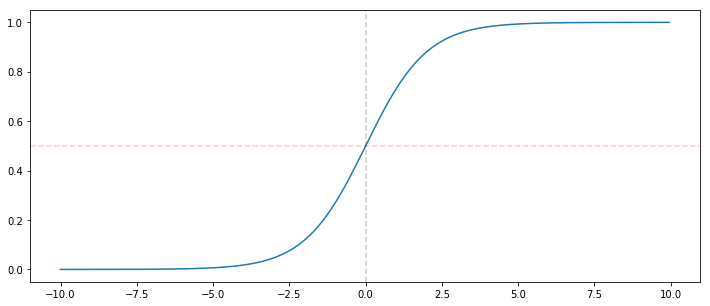

In [2]:

x_axis = np.arange(-10, 10, 0.05)
y_axis = 1 / (1 + np.e**-x_axis)
plt.figure(figsize=(12,5))
plt.plot(x_axis, y_axis)
plt.axhline(0.5, linestyle="--", color='r', alpha=0.2)
plt.axvline(0, linestyle="--", color='k', alpha=0.2)

### Parameters of the Logstic 

Linear Regression was able to help us predict values on a scale of 0 - 100.
On the other hand, **Logistic Regression** could help us predict whether something is true or false, as **Logistic regression** predictions are discrete (only specific values or categories are allowed). In the examples below we will cover **Binary logistic Regression** (i.e. True/False).

We saw that $g(x) = \frac{1}{1+e^-(\beta_0 + \beta_1~x)}$, which returns a probability score between 0 and 1. In order to map this to a discrete class (i.e. true/false), we select a threshold value or tipping point which we will classify values into two classes: $\begin{split}p \geq 0.5, class=1 \\
p < 0.5, class=0\end{split}$


As with the linear regression, we assumed that the params of the model $\beta_0$ and $\beta_1$ can be anything. Below we can observe how altering the value of $\beta_0$ changes the point of intersection between the sigmoid and the **Decision Bound**. Whereas altering $\beta_1$ changes the slope of the sigmoid. 

see __[this for information about parameters of logistic regression models](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf)__

### Changing $\beta_0$

Changing the value of $\beta_0$ changes the point of intersection between the sigmoid and the Decision Bound. The grey dashed line shows the intersection of the sigmoid and the decision bound and the red dashed line represents the decision bound.  

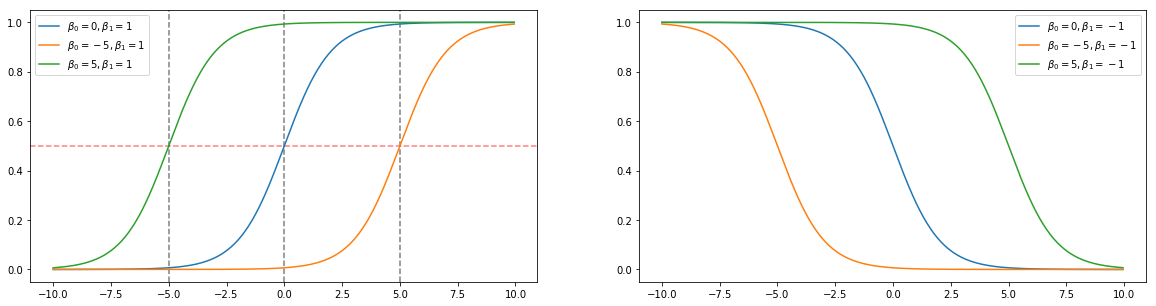

In [3]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.axhline(0.5, linestyle="--", color='r', alpha=0.5)
plt.axvline(0, linestyle="--", color='k', alpha=0.5)
plt.axvline(-5, linestyle="--", color='k', alpha=0.5)
plt.axvline(5, linestyle="--", color='k', alpha=0.5)
x = np.arange(-10, 10, 0.05)

beta_0, beta_1 = (0, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (-5, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (5, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()

plt.subplot(1, 2, 2)
beta_0, beta_1 = (0, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (-5, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (5, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()


### Changing $\beta_1$
Changing the value of $\beta_1$ changes the slope of the sigmoid. The grey dashed line shows the intersection of the sigmoid and the decision bound and the red dashed line represents the decision bound.  


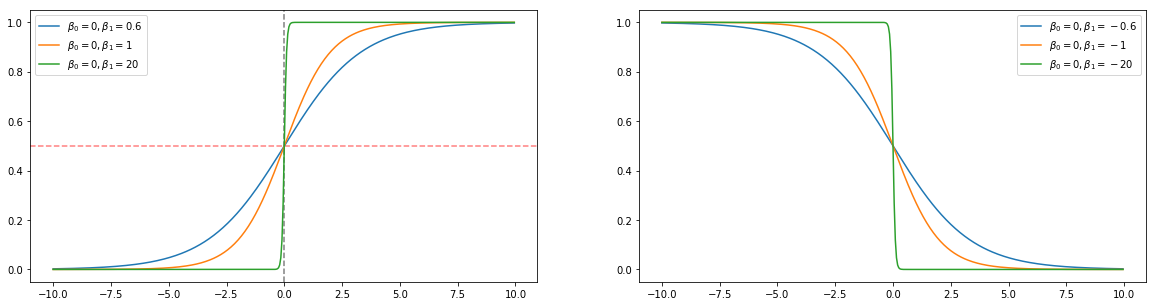

In [4]:
plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.axhline(0.5, linestyle="--", color='r', alpha=0.5)
plt.axvline(0, linestyle="--", color='k', alpha=0.5)
x = np.arange(-10, 10, 0.05)

beta_0, beta_1 = (0, 0.6) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, 1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, 20) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()

plt.subplot(1, 2, 2)
beta_0, beta_1 = (0, -0.6) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, -1) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

beta_0, beta_1 = (0, -20) 
y = 1 / (1 + np.e **-(beta_0 + beta_1*x))
plt.plot(x, y, label = r'$\beta_0 = {}, \beta_1 = {}$'.format(beta_0, beta_1))

plt.legend()


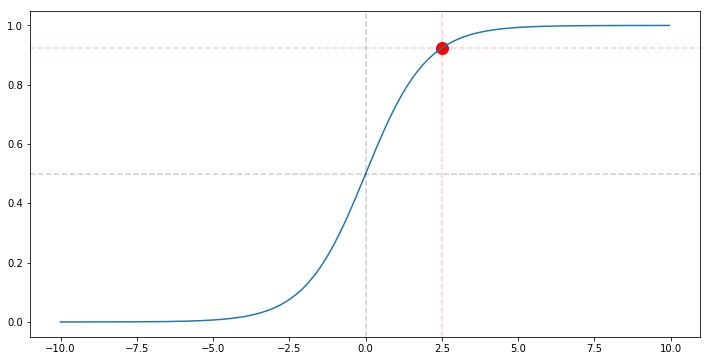

In [5]:
x_axis = np.arange(-10, 10, 0.05)
y_axis = 1 / (1 + np.e**-x_axis)
plt.figure(figsize=(12,6))
plt.plot([2.5], [1 / (1 + np.e**-2.5)], 'or', markersize=12)

plt.plot(x_axis, y_axis)
plt.axhline(0.5, linestyle="--", color='k', alpha=0.2)
plt.axvline(0, linestyle="--", color='k', alpha=0.2)

plt.axhline(1 / (1 + np.e**-2.5), linestyle="--", color='r', alpha=0.2)
plt.axvline(2.5, linestyle="--", color='r', alpha=0.2)




### Fitting the Model: Linear Regression Parallel

  Previously in linear regression, we mentioned that the straight line fitting of the data can be obtained by minimizing the distance between each dot of a plot and the regression line. In fact we minimize the sum of the squares of the distance between dots and the regression line (squared in order to avoid negative differences) and among all possible lines, the one selected has the smallest sum of squared residuals. This is called the least sum of square method. We are then able to identify $\beta_0$ and $\beta_1$ which minimise the sum of squares.
  
see __[this for information about fitting logistic regression models](https://wiki.ecdc.europa.eu/fem/w/wiki/fitting-logistic-regression-models/revision/41)__

### Fitting the Model

However, in logistic regression, the method is more complicated. It is called the maximum likelihood method. Maximum likelihood will provide values of $\beta_0$ and $\beta_1$ which maximise the probability of obtaining the data set. Specifically, in binary logistic regression, the outcomes  are 0 and 1, and the predictions are also either 0 or 1. 
One trivial approach would consist in identifying the sigmoid function that minimizes the mispredictions, using the same method as in linear regression, we could describe the function as:

$$
\frac{1}{n} \sum_1^n (g(x) - y)
$$

It would require iterative computing and is easily done with most computer software. Unfortunately, this function is not convex but does guarantee that the function will converge to the global minimum. 

### Fitting the Model- Cont'd


 Unfortunately, we can't use the same cost function as we did for linear regression. Why? It’s because our new prediction function is non-linear (due to sigmoid transform). Squaring this prediction results in a non-convex function (as seen above) with many local minimums. If our cost function has many local minimums, gradient descent may not find the optimal global minimum.

Instead, given some tuple ($\beta_0$ and $\beta_1$), the following convex function (Cross-entropy) is commonly used to compute the cost

$$
    cost(g(x),y) = \left\{
    \begin{array}{ll}
        -log(g(x)) & \mbox{ if }  y = 1 \\
        -log(1 - g(x)) & \mbox{ if }  y = 0 \\
    \end{array}
\right.
$$

Cross-entropy loss can be divided into two separate cost functions: one for $y = 1$ and one for $y = 0$. Remember that $g(x)$ is simply the probability that the class is 1.

see __[this guide for more information](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)__


### Cost Function Explained  ($y=1$)

$$
        -log(g(x)) \mbox{ if }  y = 1
$$

For $y = 1$

Recall that the X axis is what we predict (cost function) and the Y axis is the cost associated with that prediction. So when we're right, cost function (g(x)) is 0, else, it slowly increases the cost function as we become "more" wrong.


This cost functions has some interesting properties:
If $y = 1$ and $g(x) = 1$, then we incur no cost.
Also, if the hypothesis predicts exactly 1 and thats exactly correct then that corresponds to 0 (exactly, not nearly 0). Lastly, if g(x) goes to 0 the cost goes to infinity.
This captures the intuition that if g(x) = 0 (predict $P (y=1|x; θ) = 0$) but $y = 1$ this will penalize the learning algorithm with a massive cost.

see __[this guide for more information](http://www.holehouse.org/mlclass/06_Logistic_Regression.html)__

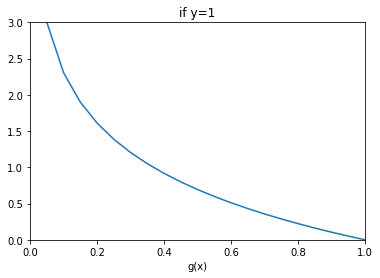

In [6]:
x_axis = np.arange(0.000001, 1.1, 0.05)
y_axis = - np.log(x_axis)
plt.plot(x_axis, y_axis)
plt.xlim(0,1)
plt.ylim(0,3)
plt.title("if y=1")
plt.xlabel("g(x)")

plt.show()

### Cost Function Explained ($y=0$)

$$
        -log(1 - g_(x)) \mbox{ if }  y = 0 \\
$$
for $y = 0$
The cost is evaluated as the function above and we simply get inverse of the other function, meaning if the prediction/function is 0, then we incur no cost and if only the prediction is 1, then we are incurring an infinite cost. 
see __[this guide for more information](http://www.holehouse.org/mlclass/06_Logistic_Regression.html)__

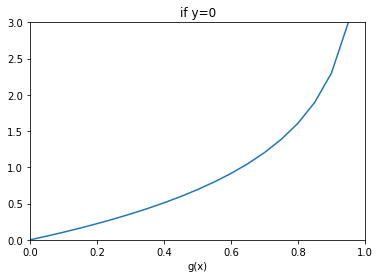

In [7]:
x_axis = np.arange(0, 0.9999999, 0.05)
y_axis = - np.log(1 - x_axis)
plt.plot(x_axis, y_axis)
plt.xlim(0,1)
plt.ylim(0,3)
plt.title("if y=0")
plt.xlabel("g(x)")
plt.show()

### Training

Training a model is the process of iteratively improving your prediction equation by looping through the dataset multiple times, each time updating the weight and bias values in the direction indicated by the slope of the cost function (gradient). Training is complete when we reach an acceptable error threshold, or when subsequent training iterations fail to reduce our cost. Therefore, by averaging the cost over all instances in the data, we end up with the parameters ($\beta$s) that best fit the data. Thus for a dataset of size $n$, we pick the tuple $\beta$ of params which minimizes:

$$
\sum_{\forall x}cost(g(x)_{\beta},y)~~/~~n
$$

see __[this guide for more information](https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html#introduction)__

### Prediction
Now that we have parameters $\beta_0$ and $\beta_1$ from training which minimize g(x), we have a set of parameters to use in our model for future predictions. So, if we're given some new example with set of features X, we can take the parameters ($\beta s$) which we generated, and output a prediction for the probability of true by using:
$$
p(y=1| x, \beta_0,\beta_1) = g(x) = \frac{1}{1+e^{\beta_0+\beta_1~x}}
$$
 Or, recall thast the probabolty of false is merely $1- p(y=1| x, \beta_0,\beta_1)$


### Logistic Regression with `sklearn`

Using statsmodels, we can infer the values of $\beta_0$ and $\beta_1$ such that

$$
    default = \frac{1}{1 + e^{-(\beta_o + \beta_1 ~ balance})} + \epsilon_x
$$

Similar  to the regression, $\epsilon$ is the noise component. The data below is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. We will examine if each client has has credit in default based on balance.

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [17]:
data = pd.read_csv("data/bank.csv", sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [18]:
data["encoded_default"] = data["default"].map({"no":0, "yes":1})

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,encoded_default
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


In [10]:
data.loc[:, "balance"]

0       1787
1       4789
2       1350
3       1476
4          0
5        747
6        307
7        147
8        221
9        -88
10      9374
11       264
12      1109
13       502
14       360
15       194
16      4073
17      2317
18      -221
19       132
20         0
21        16
22       106
23        93
24       543
25      5883
26       627
27       696
28       784
29       105
        ... 
4491       0
4492     309
4493       0
4494     668
4495    1175
4496     363
4497      38
4498    1183
4499     942
4500    4196
4501     297
4502     -91
4503     362
4504    1080
4505     620
4506    -166
4507     288
4508     642
4509    2506
4510     566
4511     668
4512    1100
4513     322
4514    1205
4515     473
4516    -333
4517   -3313
4518     295
4519    1137
4520    1136
Name: balance, Length: 4521, dtype: int64

In [11]:
logreg = LogisticRegression(C=1e6, solver='lbfgs')

X = data["balance"].values.reshape(-1,1) 
Y = data["encoded_default"].values 
logreg.fit(X, Y)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [12]:
logreg.coef_, logreg.intercept_


(array([[-0.00256206]]), array([-3.51998308]))

### Model Interpretation - Balance


$$
    P(default=1| x, \beta_0, \beta_1) \approx \frac{1}{1 + e^{3.5 + 0.0025 ~ balance}}
$$

Based on our function above, with x equal to the balance, $\beta_1$ equal to the units (dollar), we may predict the probability of defaulting. By plugging in the values obtined by coef_ (Coefficient of the features in the decision function) as $\beta_1$ and intercept_ (bias added to the decision functionan) as $\beta_0$, we can see an increase of a balnce of $1, decreases the probability of defaulting. 
  
$$
    P(default=1| x=1, \beta_0=-3.5, \beta_1=-0.0025) \approx \frac{1}{1 + e^{3.5 + 0.0025 * 1}} = 0.02
$$

By the same logic, an increase of a balance of $2,000, decreases the probability of defaulting even further

$$
    P(default=1| x=2,000, \beta_0=-3.5, \beta_1=-0.0025) \approx \frac{1}{1 + e^{3.5 + 0.0025 * 2,000}} \approx 0.0002
$$

### Multiple Logistic Regression

When must we use multiple logistic regression?

We use multiple logistic regression when you have one nominal and two or more measurement variables. The nominal variable is the dependent variable (in the above case, the encoded default); you are studying the effect that the independent variables (i.e. balance and housing loan) have on the probability of obtaining a particular value of the dependent variable (default - yes or no). 

Explicitly, let us investigate the effect of clients balance and home loan have on the probability that a person will default. 


see __[this guide for more information](http://www.biostathandbook.com/multiplelogistic.html)__


In [13]:
data["encoded_housing"] = data["housing"].map({"no":0, "yes":1})
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,encoded_default,encoded_housing
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0,1


In [14]:
X = data["encoded_housing"].values.reshape(-1,1)
y = data["encoded_housing"].values

logreg.fit(X, Y)
logreg.coef_, logreg.intercept_

(array([[0.10883866]]), array([-4.13180592]))

# Model Interpretation - Housing Loan Status


$$
    P(default=1| x, \beta_0, \beta_1) \approx \frac{1}{1 + e^{4.1 - 0.1 ~ housing}}
$$

If we are to investigate the effect that clients balance and home loan have on the probability that a person will default the probability of a a client defaulting while having a housing loan is 

$$
    P(default=1| x=1, \beta_0=-4.1, \beta_1=0.1) \approx \frac{1}{1 + e^{4.1 - 0.1 ~ 1}} \approx 0.018
$$


However, if a client does not have a housing loan, the probability that they will default decreases slightly:

$$
    P(default=1 | x=0, \beta_0=-4.1, \beta_1=0.1) \approx \frac{1}{1 + e^{4.1 - 0.1 ~ 0}} \approx 0.016
$$


### Multiple Logistic Regression Cont'd

As you can see with the above example, when we added more relevant variables, the logistic regression model becomes more discriminative. We can investigate the effect of different variables simultaneously using this method. 


In [15]:
X = data[['balance', 'encoded_housing']]

y = data["encoded_default"].values

logreg.fit(X, Y)

logreg.coef_, logreg.intercept_


(array([[-0.00261148, -0.21855991]]), array([-3.39336633]))

### Function For a More Discriminative Model
$$
    P(default=1| x, \beta_0, \beta_1) \approx \frac{1}{1 + e^{3.5  - 0.0025 balance + 0.21 ~ housing}}
$$

### Inspecting the Contribution of last contact Duration

Not all variables are relevant, and somtimes the correlation between two variables is low, meaning the model is less relevant. For example, instead of looking at housing loans, we will attempt to relate the balance of a clients account to the duration of thir last contact with the bank.

What does the logistic regression model say about the contribution of the last contact duration? Looking below, there is no relevant corrleation between account balance and last contact duration. The only coculusion (and this is streching far..) is that the longer the call duration, the lower the account balance. But in general, this is no good.

/home/muzamil/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/muzamil/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


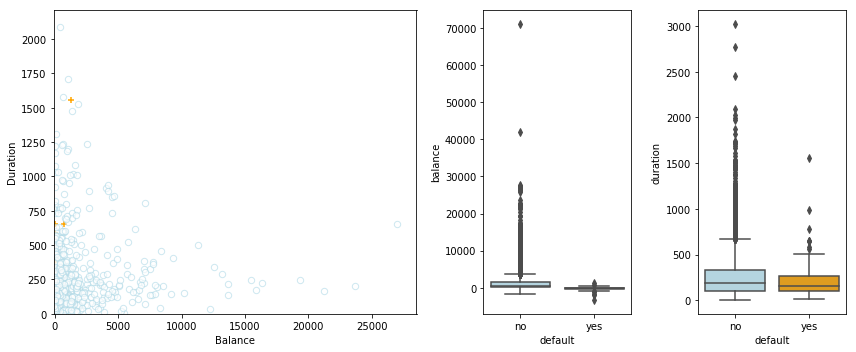

In [16]:
import matplotlib as mpl
import seaborn as sns

fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = data[data["encoded_default"] == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = data[data["encoded_default"]  == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.default == 'yes'].balance, df_[df_.default == 'yes'].duration, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.default == 'no'].balance, df_[df_.default == 'no'].duration, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Duration')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {'no':'lightblue', 'yes':'orange'}
sns.boxplot('default', 'balance', data=data, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('default', 'duration', data=data, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

## Categortical Variables as Predictors

Categorical variables which are also called nominal variables, are variables which have more than one category.  An example of this would be a variable used for animals.  Each category in the set of animals is represented by an integer in no particular order. 0 could represent dogs, 1 could represent cows, 2 could represent frogs and so on.

## One-Hot-Encoding

An alternative to the above encoding would be to have the variable hold a list of binary values with the size of the list being the number of categories.  Each binary value represents one of the categories and it's assigned 1 if the instance falls under that category and 0 if it does not.  In the animal example, a data point that is a cow would be given the value [0,1,0,...,0] where every binary value except the one indexed by the cow's encoded value(1), is 0. Likewise a frog datapoint would have a value of [0,0,1,...,0] 

## Relationship Between Logistic and Linear Model

The function used for logistic regression is: 

$p(x)=\frac{1}{1+e^{-}(β_0+β_1x)}$

This function can be changed into the following.

$p(x)=\frac{e^{(β_0+β_1x)}}{1+e^{e(β_0+β_1x)}}$

$\frac{p(x)}{1-p(x)}=e^{β_{0}+β_{1}x}$

The left side of the above function, $\frac{p(x)}{1-p(x)}$, is the odd ratio. It can be used to calculate the odds given a probability p(x).  The value of the odds can range between 0 and infinity.  Let's say that the probability of defaulting is p(x) = 0.2. The odds of defaulting would be 

$\frac{0.2}{1-0.2}$=1/4

resulting in 1 to 4 odds.

Next, we can to the log of both sides of the function  Taking the log of an odds is called log-odds or logit.  The logit makes it so that any logit value is equal to its reciprocal multiplied by -1.

$\frac{p(x)}{1-p(x)}=e^{β_{0}+β_{1}x}$

$log(\frac{p(x)}{1-p(x)})={β_{0}+β_{1}x}$

The right side of the function is the equation of a line.  Therefore, the linear model has a logit that is linear in X Unline in linear mode

